# Graphs and Trees 

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

## Graphs and Networks   

A network is a graph. That is:

* A set of vertices (or nodes) joined by edges.   
* Vertices and edges can have properties (feature values).  
* Edges can have weights and be directed.

NetworkX is a library for study of the structure, dynamics, and function of complex networks.

WNetworkX can load and store networks in standard and nonstandard data formats, generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, etc..

Library documentation: <a>https://networkx.github.io/</a>

In NetworkX, nodes can be any hashable object e.g. a text string, an image, another Graph, etc.

In [2]:
import networkx as nx

In [3]:
# Create an empty graph with no nodes and no edges.
G = nx.Graph()

## Nodes

The graph G can be grown in several ways. NetworkX includes many graph generator functions.  

In [4]:
# You can add one node at a time,
G.add_node(1)

In [5]:
# add a list of nodes
G.add_nodes_from([2, 3])

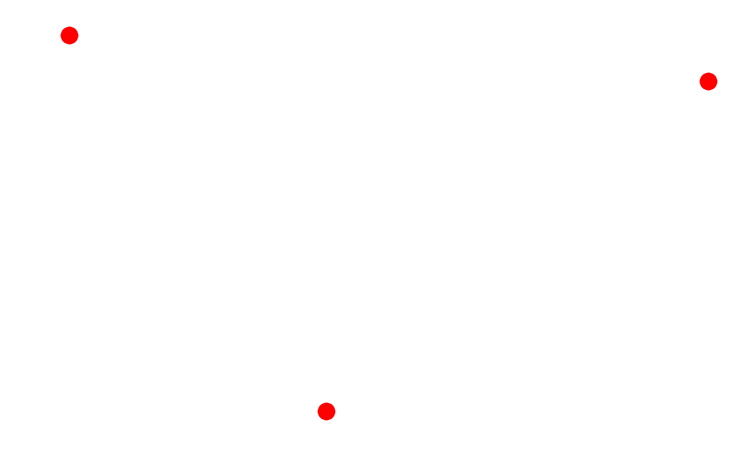

In [6]:
nx.draw(G)
plt.show()

In [7]:
#Quick snapshot of the Network
print (nx.info(G))

Name: 
Type: Graph
Number of nodes: 3
Number of edges: 0
Average degree:   0.0000


## Petersen graph

In the mathematical field of graph theory, the Petersen graph is an undirected graph with 10 vertices and 15 edges. It is a small graph that serves as a useful example and counterexample for many problems in graph theory.


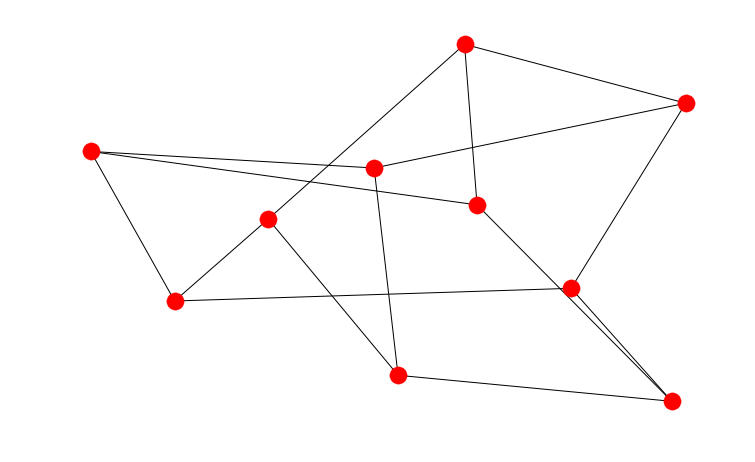

In [8]:
gp = nx.petersen_graph()
nx.draw(gp)
plt.show()

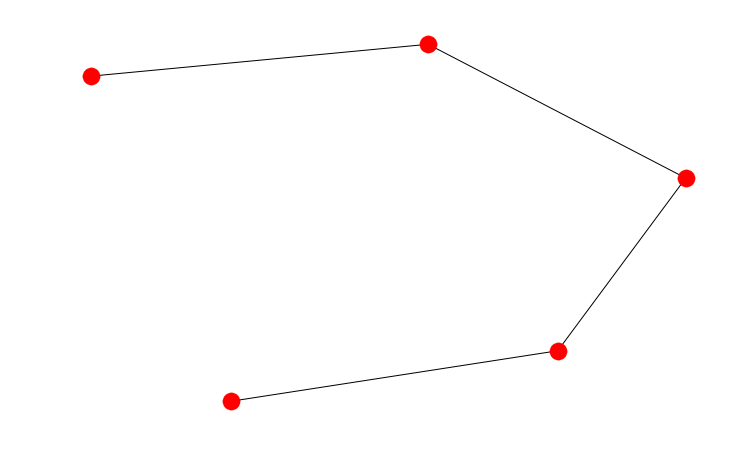

In [9]:
H = nx.path_graph(5)
nx.draw(H)
plt.show()

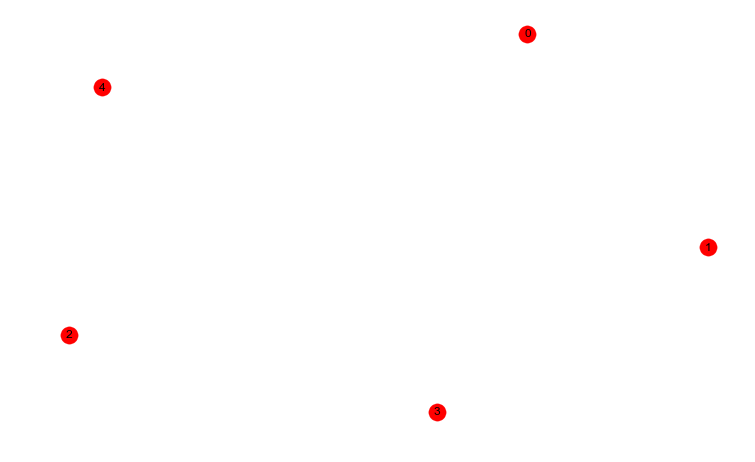

In [10]:
# Add nodes from another graph
G.add_nodes_from(H)
nx.draw(G, with_labels = True)
plt.show()

In [11]:
#Quick snapshot of the Network
print (nx.info(G))

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 0
Average degree:   0.0000


## Edges

In [12]:
G.add_edge(1, 2)
e = ((2, 3),(3,4))
G.add_edge(*e) # unpack edge tuple*
print (nx.info(G))

Name: 
Type: Graph
Number of nodes: 7
Number of edges: 2
Average degree:   0.5714


In [13]:
G.add_edges_from(H.edges())

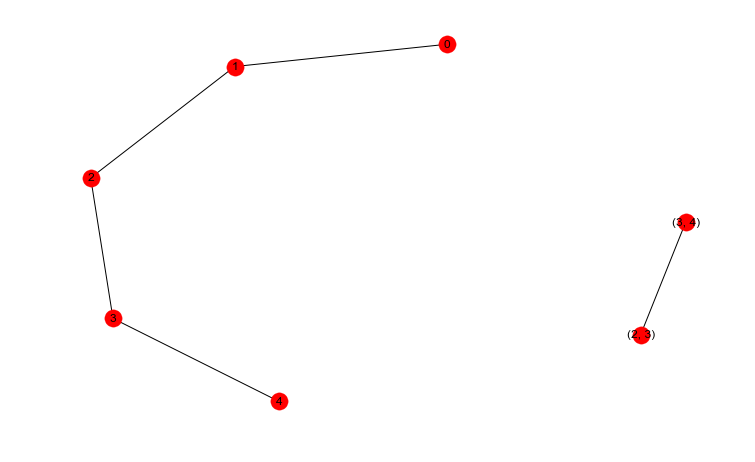

In [14]:
nx.draw(G, with_labels = True)
plt.show()

In [15]:
# adding a list of edges
G.add_edges_from([(1, 2),(1, 5)])

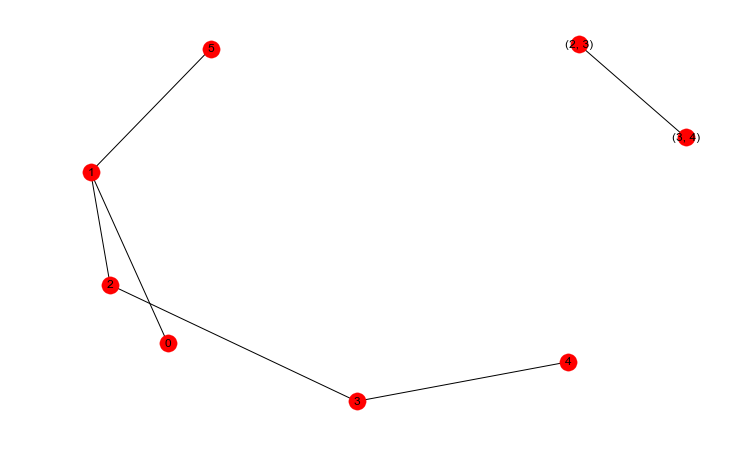

In [16]:
nx.draw(G, with_labels = True)
plt.show()

In [17]:
G.add_edges_from([(3,2),(4,3)])
G.add_node(7)
G.add_edge(7,2)
G.add_node('spam')       # adds node "spam"
G.add_nodes_from('spam') # adds 4 nodes: 's', 'p', 'a', 'm'

In [18]:
print (nx.info(G))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 7
Average degree:   1.0000


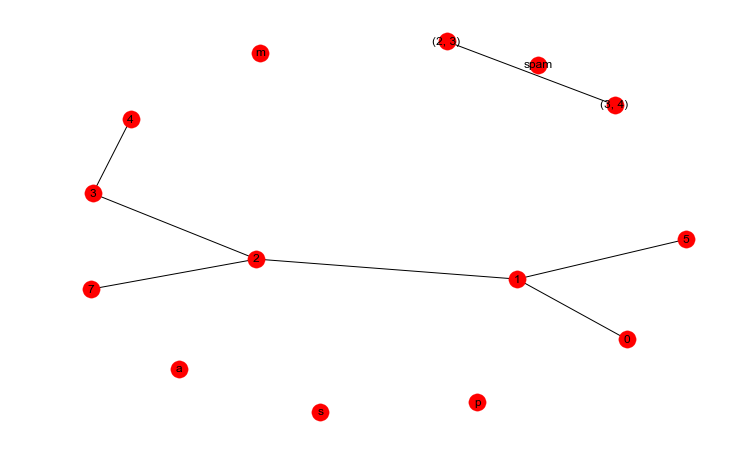

In [19]:
nx.draw(G, with_labels = True)
plt.show()

In [20]:
G.number_of_nodes()

14

In [21]:
G.number_of_edges()

7

In [22]:
list(G.nodes())

[1, 2, 3, 0, 4, (2, 3), (3, 4), 5, 7, 'spam', 's', 'p', 'a', 'm']

In [23]:
list(G.edges())

[(1, 2), (1, 0), (1, 5), (2, 3), (2, 7), (3, 4), ((2, 3), (3, 4))]

In [24]:
G[1][5]['color']='blue'

In [25]:
list(G.neighbors(1))

[2, 0, 5]

In [26]:
e0=G.edges()[0]
print (e0)

(1, 2)


In [27]:
G.remove_edge(e0[0],e0[1]) # G.remove_edge(1,0)

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 6
Average degree:   0.8571


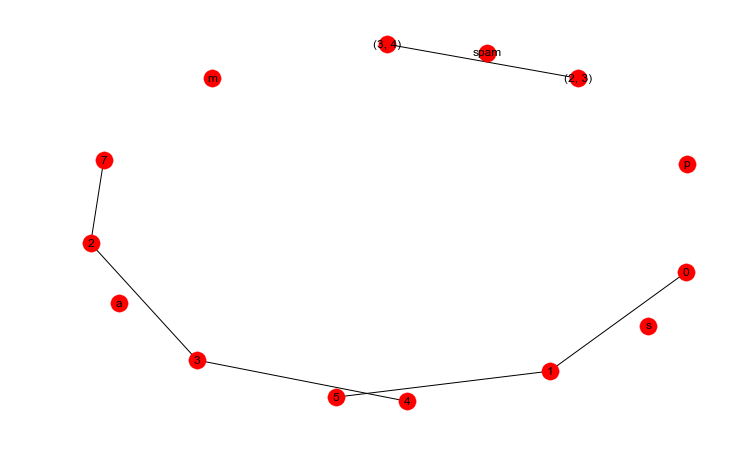

In [28]:
print (nx.info(G))
nx.draw(G, with_labels = True)
plt.show()

## Directed graph

In mathematics, and more specifically in graph theory, a directed graph (or digraph) is a graph that is a set of vertices connected by edges, where the edges have a direction associated with them.

In [29]:
D = nx.DiGraph(G)  # create a DiGraph using the connections from G

In [30]:
list(D.edges())

[(1, 0),
 (1, 5),
 (2, 3),
 (2, 7),
 (3, 2),
 (3, 4),
 (0, 1),
 (4, 3),
 ((2, 3), (3, 4)),
 ((3, 4), (2, 3)),
 (5, 1),
 (7, 2)]

In [31]:
print (nx.info(D))

Name: 
Type: DiGraph
Number of nodes: 14
Number of edges: 12
Average in degree:   0.8571
Average out degree:   0.8571


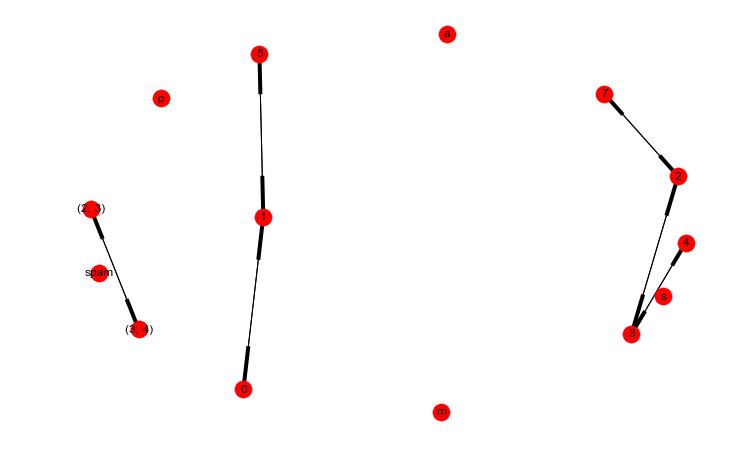

In [32]:
nx.draw(D, with_labels = True)
plt.show()

## Weighted graphs

A weighted graph is a graph in which each edge is given a numerical weight. A weighted graph is therefore a special type of labeled graph in which the labels are numbers.

In [33]:
WG = nx.Graph()

In [34]:
WG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75),  (1, 5, 3.3), (2 ,4 , 1.2), (3 ,4 , 0.375)])

In [35]:
print (nx.info(WG))

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 5
Average degree:   2.0000


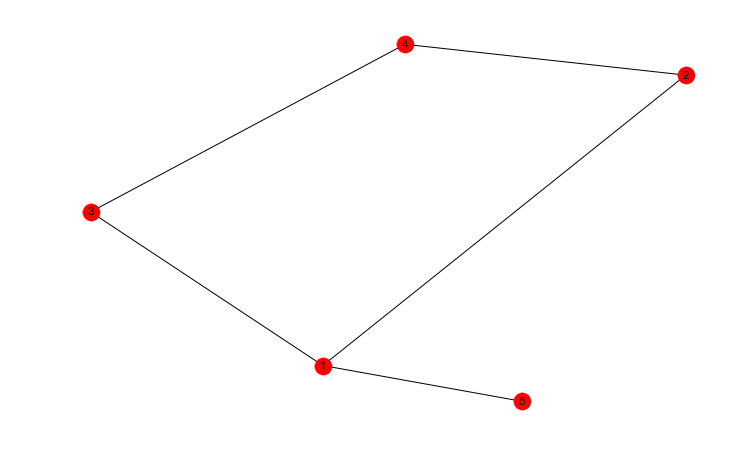

In [36]:
nx.draw(WG, with_labels = True)
plt.show()

In [37]:
G=nx.dodecahedral_graph()

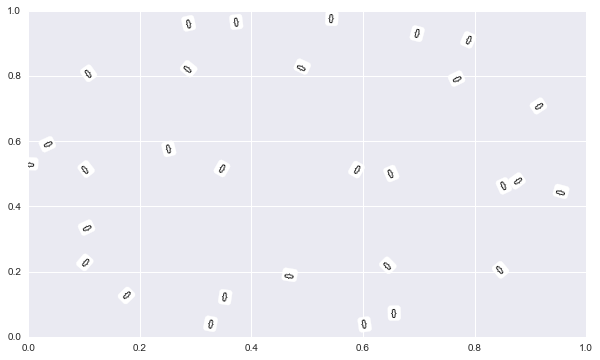

In [38]:
edge_labels=nx.draw_networkx_edge_labels(G,pos=nx.spring_layout(G))

In [39]:
print (nx.info(G))

Name: Dodecahedral Graph
Type: Graph
Number of nodes: 20
Number of edges: 30
Average degree:   3.0000


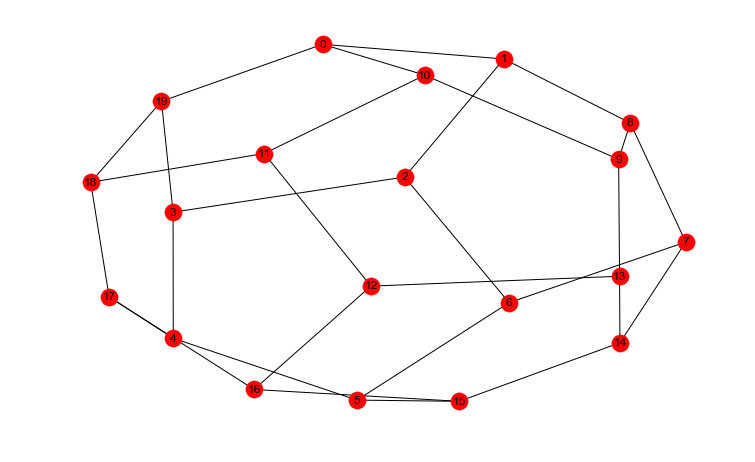

In [40]:
nx.draw(G, with_labels = True)
plt.show()

## Adding attributes to graphs, nodes, and edges

In [41]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [42]:
# you can modify attributes later
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

## Multigraphs

Multigraphs are graphs which allow multiple edges between any pair of nodes.

In [43]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [44]:
print (nx.info(MG))

Name: 
Type: MultiGraph
Number of nodes: 3
Number of edges: 3
Average degree:   2.0000


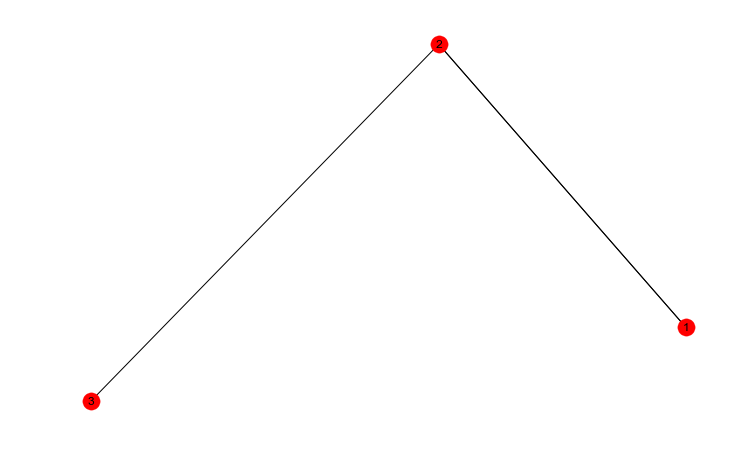

In [45]:
nx.draw(MG, with_labels = True)
plt.show()

## Graph generators and graph operations

Name: Tutte's Graph
Type: Graph
Number of nodes: 46
Number of edges: 69
Average degree:   3.0000


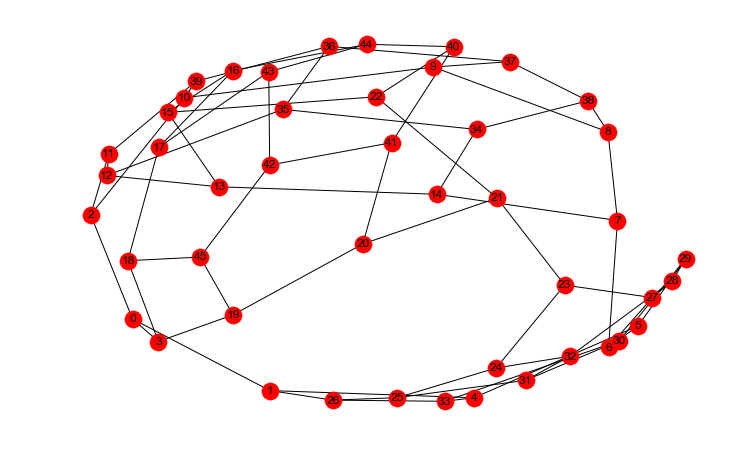

In [46]:
tutte = nx.tutte_graph()
print (nx.info(tutte))
nx.draw(tutte, with_labels = True)
plt.show()

Name: Sedgewick Maze
Type: Graph
Number of nodes: 8
Number of edges: 10
Average degree:   2.5000


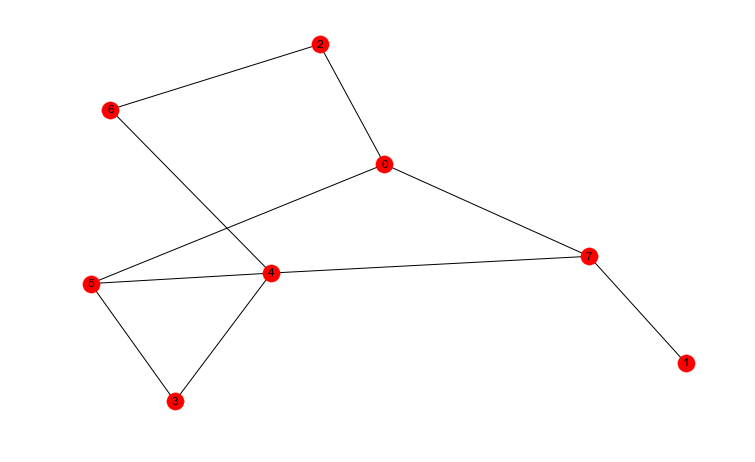

In [47]:
maze = nx.sedgewick_maze_graph()
print (nx.info(maze))
nx.draw(maze, with_labels = True)
plt.show()

Name: Platonic Tetrahedral graph
Type: Graph
Number of nodes: 4
Number of edges: 6
Average degree:   3.0000


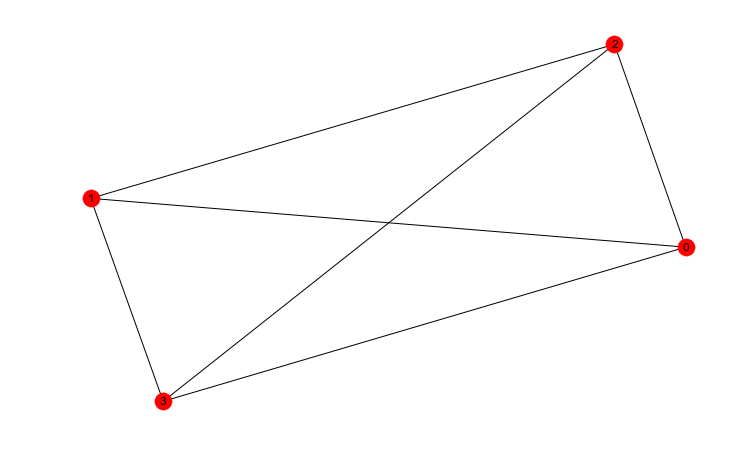

In [48]:
tet = nx.tetrahedral_graph()
print (nx.info(tet))
nx.draw(tet, with_labels = True)
plt.show()

Name: complete_graph(5)
Type: Graph
Number of nodes: 5
Number of edges: 10
Average degree:   4.0000


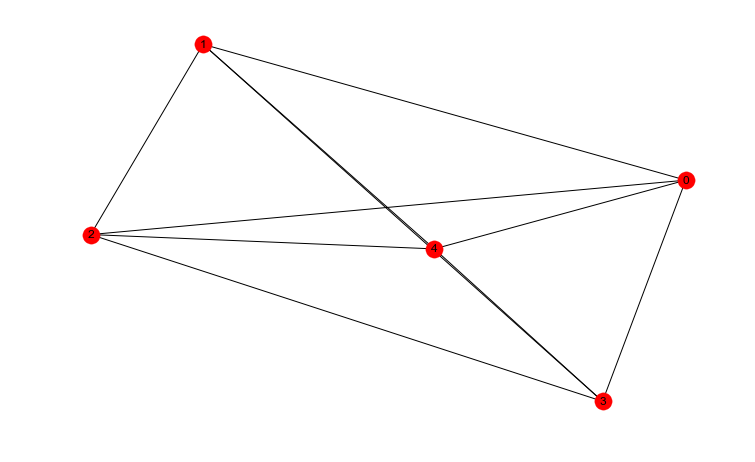

In [49]:
K_5 = nx.complete_graph(5)
print (nx.info(K_5))
nx.draw(K_5, with_labels = True)
plt.show()

Name: barbell_graph(10,10)
Type: Graph
Number of nodes: 30
Number of edges: 101
Average degree:   6.7333


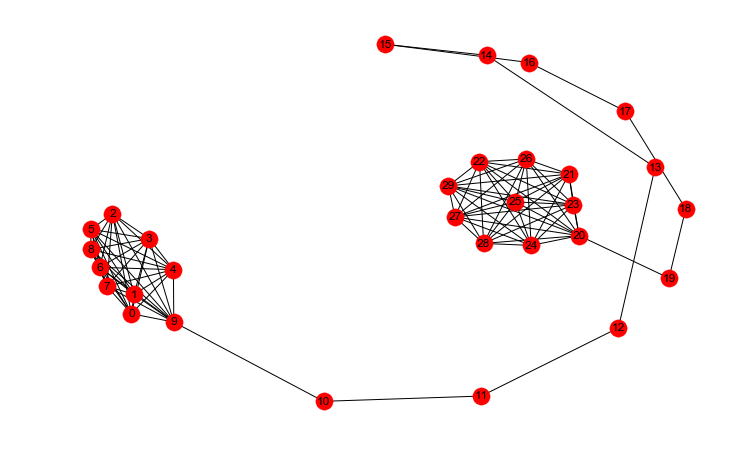

In [50]:
barbell = nx.barbell_graph(10, 10)
print (nx.info(barbell))
nx.draw(barbell, with_labels = True)
plt.show()

Name: lollipop_graph(10,20)
Type: Graph
Number of nodes: 30
Number of edges: 65
Average degree:   4.3333


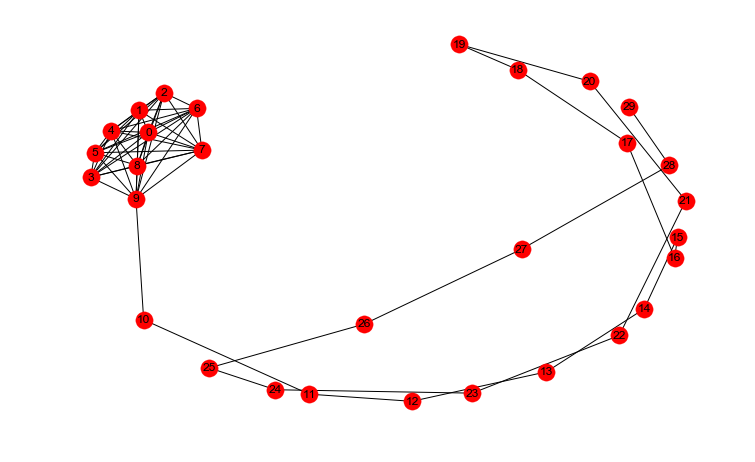

In [51]:
lollipop = nx.lollipop_graph(10, 20)
print (nx.info(lollipop))
nx.draw(lollipop, with_labels = True)
plt.show()

Name: watts_strogatz_graph(30,3,0.1)
Type: Graph
Number of nodes: 30
Number of edges: 30
Average degree:   2.0000


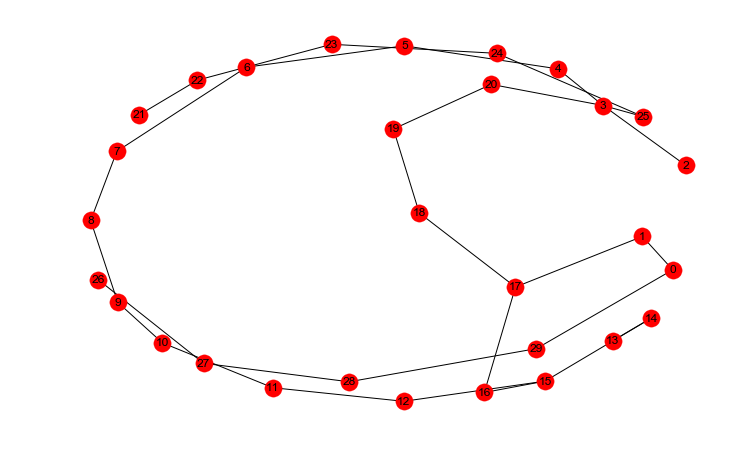

In [52]:
ws = nx.watts_strogatz_graph(30, 3, 0.1)
print (nx.info(ws))
nx.draw(ws, with_labels = True)
plt.show()

Name: barabasi_albert_graph(100,5)
Type: Graph
Number of nodes: 100
Number of edges: 475
Average degree:   9.5000


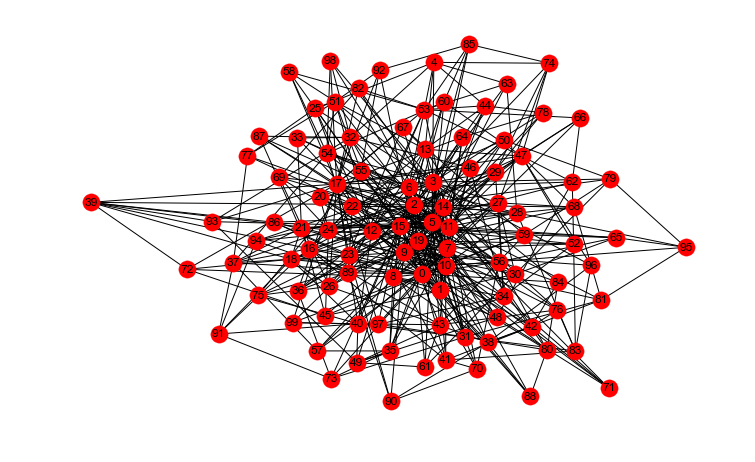

In [53]:
ba = nx.barabasi_albert_graph(100, 5)
print (nx.info(ba))
nx.draw(ba, with_labels = True)
plt.show()

Name: random_lobster(100,0.9,0.9)
Type: Graph
Number of nodes: 121
Number of edges: 120
Average degree:   1.9835


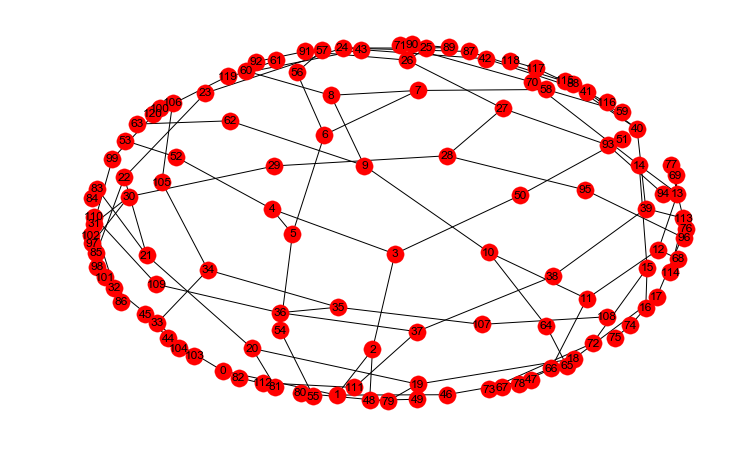

In [54]:
red = nx.random_lobster(100, 0.9, 0.9)
print (nx.info(red))
nx.draw(red, with_labels = True)
plt.show()

## Trees

See [https://link.springer.com/chapter/10.1007/978-3-319-13072-9_6][https://link.springer.com/chapter/10.1007/978-3-319-13072-9_6]

Last update October 3, 2017